<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


<br>

## Import Libraries and Define Auxiliary Functions


In [1]:
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


np.random.seed(0) 

In [3]:
## New metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

<br>

## Load the dataframe


Load the data


In [5]:
#from js import fetch
#import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
#resp1 = await fetch(URL1)
#text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(URL1)

In [6]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
data.shape

(90, 18)

In [8]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
#resp2 = await fetch(URL2)
#text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(URL2)

In [9]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


<br>



<br>

##  Identify target variable


### TASK  1

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [10]:
Y=data['Class'].to_numpy()
Y.shape

(90,)

<br>

##  Standarize the Data

### TASK  2

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [11]:
# students get this 
transform = preprocessing.StandardScaler()
X=transform.fit(X).transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


<br>

## Split the Data 

### TASK  3

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [12]:
X_train, X_test, Y_train,Y_test =train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [13]:
Y_test.shape

(18,)

<br>

## Logistic Regression Model

### TASK  4

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [14]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [15]:
parameters ={'C':[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

#logistic regression object
lr=LogisticRegression()

#GridSearchCV object
logreg_cv=GridSearchCV(lr, parameters, cv=10)

#fit the object to find the best parameters
logreg_cv.fit(X_train, Y_train)



GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [16]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


### TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [17]:
 logreg_cv.score(X_test, Y_test)

0.8333333333333334

Lets look at the confusion matrix:


In [18]:
yhatlog=logreg_cv.predict(X_test)
confusion_matrix(Y_test,yhatlog)

array([[ 3,  3],
       [ 0, 12]], dtype=int64)

In [19]:
logf1=f1_score(Y_test,yhatlog, average='weighted')
logf1

0.8148148148148149

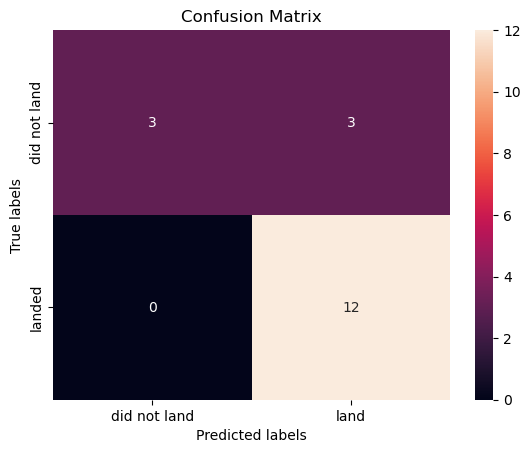

In [20]:
plot_confusion_matrix(Y_test,yhatlog)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


<br>

## SVM Model

### TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

svm = SVC(probability=True) # probability=True is for calculate ROC curve

In [22]:
#gridshearch object
svm_cv=GridSearchCV(svm, parameters, cv=10) 

#fit to find the best parameters
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [23]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [24]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


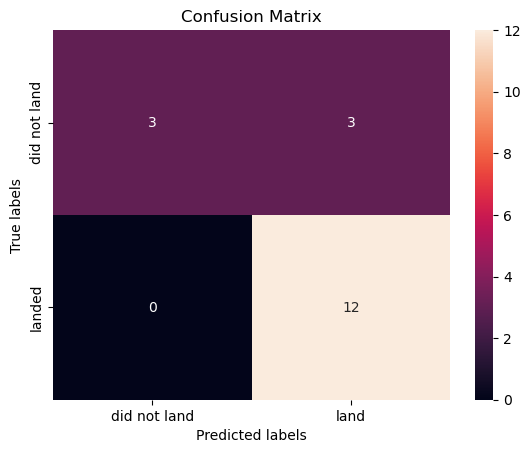

In [25]:
yhatsvm=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhatsvm)

In [26]:
svmf1=f1_score(Y_test,yhatsvm, average='weighted')
svmf1

0.8148148148148149

<br>

## Regression Tree Model

### TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [4,4,4,4],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [28]:
#gridshearch object
tree_cv=GridSearchCV(tree, parameters, cv=10)

#fit to find the best parameters
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 4, 4, 4],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [29]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [30]:
tree_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


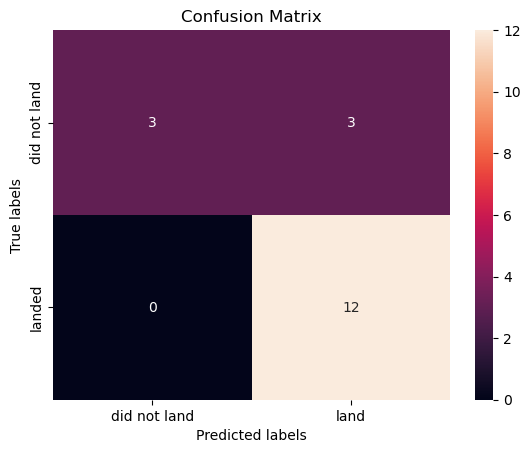

In [31]:
yhattree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhattree)

In [32]:
treef1=f1_score(Y_test,yhattree, average='weighted')
treef1

0.8148148148148149

<br>

## KNN Neighbors Model

### TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [33]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [34]:
#gridshearch object
knn_cv=GridSearchCV(KNN, parameters, cv=10)

#fit to find the best parameters
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [35]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [36]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


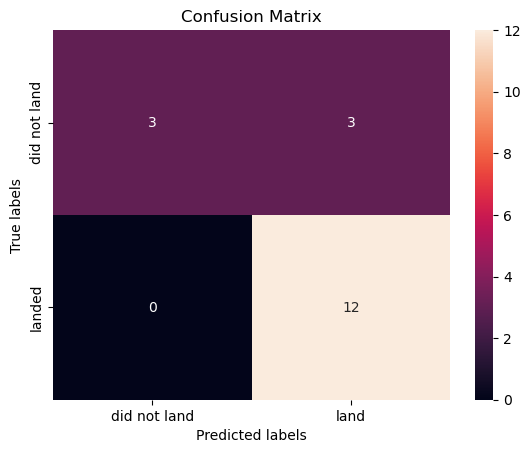

In [37]:
yhatknn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhatknn)

In [38]:
knnf1=f1_score(Y_test,yhatknn, average='weighted')
knnf1

0.8148148148148149

<br>

## Summary

### TASK  12


Find the method performs best:


In [39]:
data_scores = {'Model':['Logistic Regression', 'SVM', 'Decission Tree', 'KNN Neighbours'],
               'Model Accuracy':[logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_],
               'Test accuracy': [logreg_cv.score(X_test, Y_test), svm_cv.score(X_test, Y_test), tree_cv.score(X_test, Y_test), knn_cv.score(X_test, Y_test)],
               'F1 Score': [logf1, svmf1, treef1, knnf1]}
df = pd.DataFrame(data_scores)
df.set_index('Model', inplace=True)
df

,Model Accuracy,Test accuracy,F1 Score
Model,,,
Logistic Regression,0.846429,0.833333,0.814815
SVM,0.848214,0.833333,0.814815
Decission Tree,0.875000,0.833333,0.814815
KNN Neighbours,0.848214,0.833333,0.814815


> After comparing accuracy of above methods, they all preformed practically the same, except for tree which fit train data slightly better but test data worse, so maybe it overfit.
> 
> To choose the best model based in the evaluation metrics, a improvement of the models were performed in the followed section
> 

<br>

## Refining Evaluation Models

In [40]:
## Is our data is imbalanced? 
data['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

> ### Adding more evaluation metrics.
>
> An important part of building classification models is evaluating model performance. In short, data scientists need a reliable way to test approximately how well a model will correctly predict an outcome. There are many ways to evaluate the skill of a prediction model. For example, if you have an equal representation of all outcomes in your data accuracy, then a confusion matrix may suffice as performance metrics. Conversely, if your data exhibits an imbalance, meaning one or more outcomes are significantly underrepresented, you may want to use a metric like precision. 
>
>Two diagnostic tools that help in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling problems are ROC Curves and Precision-Recall curves.ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
>
>*Note: In the case of balanced data, the ideal threshold is 0.5. When our data is imbalanced, then the ideal threshold is often lower*.
>
>
>
>#### ROC CURVE
>A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.In Machine Learning, performance measurement is an essential task. It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics)
>
>AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. The default threshold is 0.5, and in our case, **for this threshold, we have similar scores**. This threshold can be adjusted to tune the behavior of the model for a specific problem. An example would be to reduce more of one or another type of error, **in our case false positives for all the models, as we can observe in the confusion matrix.**
>
>**ROC, it is a plot of the false positive rate (x-axis) vs. the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0.** 
>
>ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. **An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability.** 
>
>A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. A model with no skill is represented at the point (0.5, 0.5). A model with no skill at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.5.A model with perfect skill is represented at a point (0,1). A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right.
>
>The ROC curve is a useful tool for a few reasons:
>* The curves of different models can be compared directly in general or for different thresholds.
>* The area under the curve (AUC) can be used as a summary of the model skill.
>
>
>#### PRECISION-RECALL CURVE
Measures precision and recall are also useful in applied machine learning for evaluating binary classification models.
**Precision** is a ratio of the number of true positives divided by the sum of the true positives and false positives. It **describes how good a model is at predicting the positive class**. Precision is referred to as the positive predictive value.
>
>Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. **Recall is the same as sensitivity.**
>
>Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes. Specifically, there are many examples of no event (class 0) and only a few examples of an event (class 1).
>
>Key to the calculation of precision and recall is that the calculations do not make use of the true negatives. It is only concerned with the correct prediction of the minority class, class 1.
A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.
>
>The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets. A model with perfect skill is depicted as a point at (1,1). A skilful model is represented by a curve that bows towards (1,1) above the flat line of no skill.
>
>There are also composite scores that attempt to summarize the precision and recall; two examples include:
>* **F1 score:** that calculates the harmonic mean of the precision and recall (harmonic mean because the precision and recall are rates). F-Measure summarizes model skill for a specific probability threshold (e.g. 0.5)
>
>* **Area Under Curve:** like the AUC, summarizes the integral or an approximation of the area under the precision-recall curve.It summarize the skill of a model across thresholds, like ROC AUC.
This makes precision-recall and a plot of precision vs. recall and summary measures useful tools for binary classification problems that have an imbalance in the observations for each class.
>
>
>### Summary
>Generally, the use of ROC curves and precision-recall curves are as follows:
>* ROC curves should be used when there are roughly equal numbers of observations for each class or it might be deceptive and lead to incorrect interpretations of the model skill.
>* Precision-Recall curves should be used when there is a moderate to large class imbalance.
Here, we analyze both for learning purposes.
>
>
>
>References:
>
> https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
>
> https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
>
> https://builtin.com/data-science/evaluating-classification-models
>
<br>

In [41]:
#Importing required libraries

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [42]:
## Logistic
y_pred_proba_log = logreg_cv.predict_proba(np.array(X_test))[:,1]
fpr_log, tpr_log, thresholds = roc_curve(Y_test, y_pred_proba_log)

AUROC_log = np.round(roc_auc_score(Y_test, y_pred_proba_log), 2)

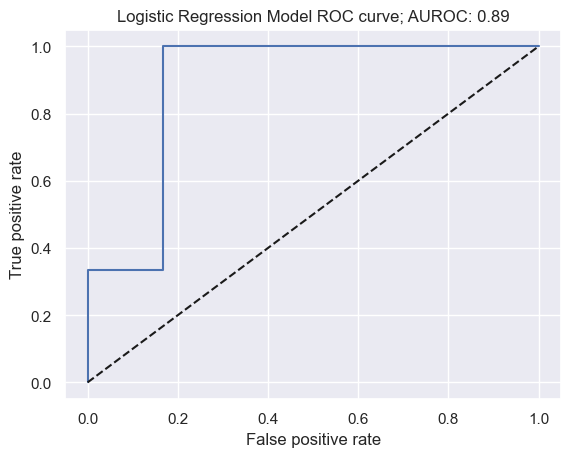

In [43]:
sns.set()

plt.plot(fpr_log, tpr_log)
plt.plot(fpr_log, fpr_log, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC_log}');

plt.show()

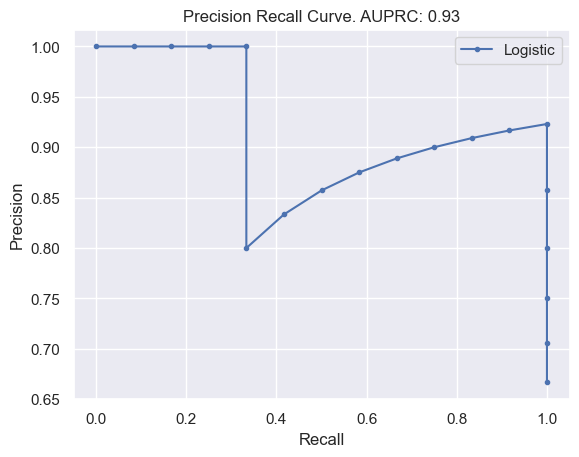

In [44]:
average_precision_log = average_precision_score(Y_test, y_pred_proba_log)
precision_log, recall_log, thresholds = precision_recall_curve(Y_test, y_pred_proba_log)

plt.plot(recall_log, precision_log, marker='.', label='Logistic')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title(f'Precision Recall Curve. AUPRC: {np.round(average_precision_log, 2)}')

plt.show()

In [45]:
## SVM
y_pred_proba_svm = svm_cv.predict_proba(np.array(X_test))[:,1]
fpr_svm, tpr_svm, thresholds = roc_curve(Y_test, y_pred_proba_svm)
AUROC_svm = np.round(roc_auc_score(Y_test, y_pred_proba_svm), 2)

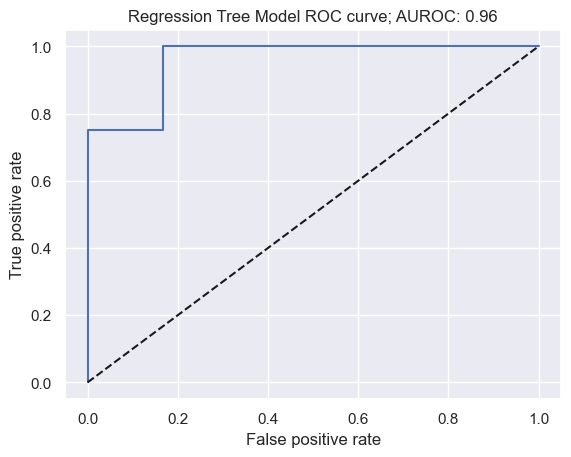

In [46]:
sns.set()

plt.plot(fpr_svm, tpr_svm)
plt.plot(fpr_svm, fpr_svm, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'Regression Tree Model ROC curve; AUROC: {AUROC_svm}');

plt.show()

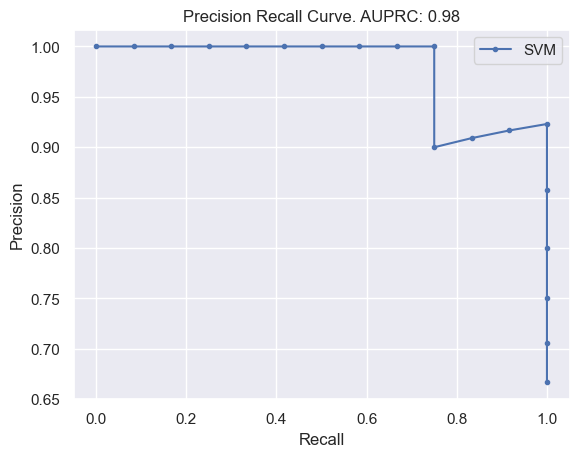

In [47]:
average_precision_svm = average_precision_score(Y_test, y_pred_proba_svm)
precision_svm, recall_svm, thresholds = precision_recall_curve(Y_test, y_pred_proba_svm)

plt.plot(recall_svm, precision_svm, marker='.', label='SVM')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title(f'Precision Recall Curve. AUPRC: {np.round(average_precision_svm,2)}')

plt.show()

In [48]:
## TREE
y_pred_proba_tree = tree_cv.predict_proba(np.array(X_test))[:,1]
fpr_tree, tpr_tree, thresholds = roc_curve(Y_test, y_pred_proba_tree)
AUROC_tree = np.round(roc_auc_score(Y_test, y_pred_proba_tree), 2)

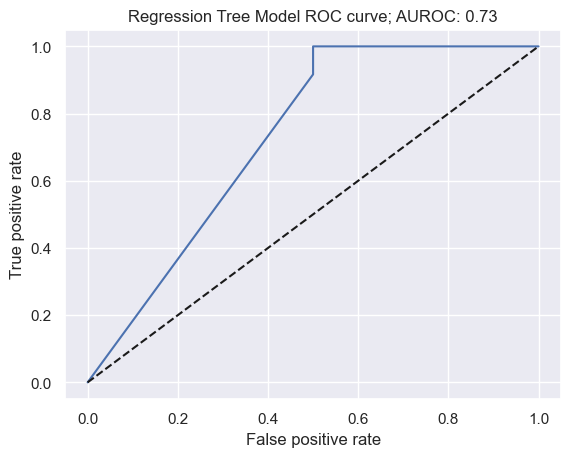

In [49]:
sns.set()

plt.plot(fpr_tree, tpr_tree)
plt.plot(fpr_tree, fpr_tree, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'Regression Tree Model ROC curve; AUROC: {AUROC_tree}');

plt.show()

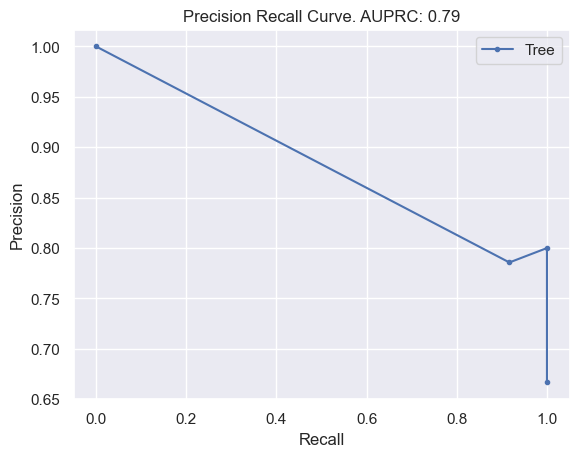

In [50]:
average_precision_tree = average_precision_score(Y_test, y_pred_proba_tree)
precision_tree, recall_tree, thresholds = precision_recall_curve(Y_test, y_pred_proba_tree)

plt.plot(recall_tree, precision_tree, marker='.', label='Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title(f'Precision Recall Curve. AUPRC: {np.round(average_precision_tree,2)}')

plt.show()

In [51]:
## KNN
y_pred_proba_knn = knn_cv.predict_proba(np.array(X_test))[:,1]
fpr_knn, tpr_knn, thresholds = roc_curve(Y_test, y_pred_proba_knn)
AUROC_KNN = np.round(roc_auc_score(Y_test, y_pred_proba_knn), 2)

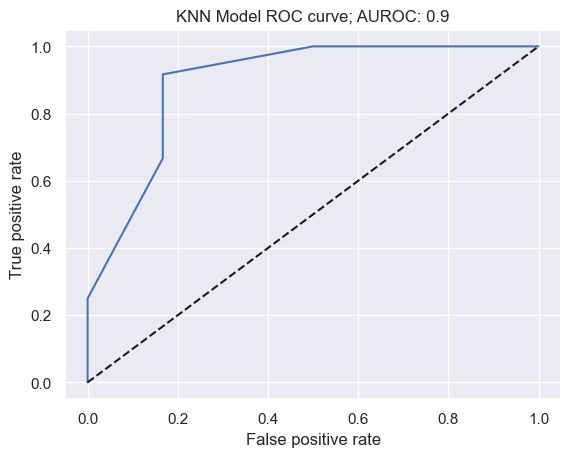

In [52]:
sns.set()

plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_knn, fpr_knn, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'KNN Model ROC curve; AUROC: {AUROC_KNN}');

plt.show()

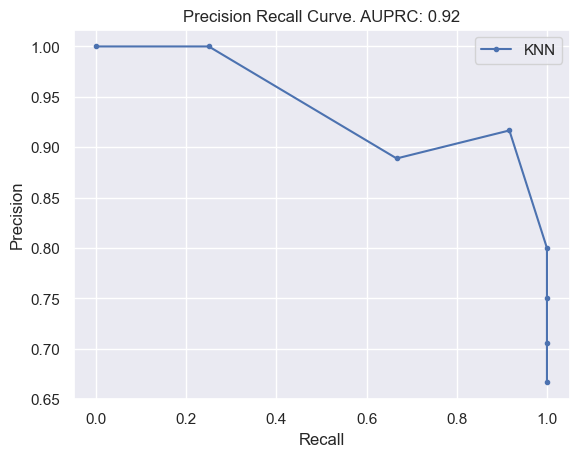

In [53]:
average_precision_KNN = average_precision_score(Y_test, y_pred_proba_knn)
precision_knn, recall_knn, thresholds = precision_recall_curve(Y_test, y_pred_proba_knn)

plt.plot(recall_knn, precision_knn, marker='.', label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title(f'Precision Recall Curve. AUPRC: {np.round(average_precision_KNN, 2)}')

plt.show()

### Summary Evaluation

In [54]:
data_scores = {'Model':['Logistic Regression', 'SVM', 'Decission Tree', 'KNN Neighbours'],
               'Model Accuracy':[logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_],
               'Test Accuracy': [logreg_cv.score(X_test, Y_test), svm_cv.score(X_test, Y_test), tree_cv.score(X_test, Y_test), knn_cv.score(X_test, Y_test)],
               'F1 Score': [logf1, svmf1, treef1, knnf1],
               'AUROC': [AUROC_log, AUROC_svm, AUROC_tree,AUROC_KNN],
               'AUPRC': [average_precision_log, average_precision_svm, average_precision_tree, average_precision_KNN]
              }
df = pd.DataFrame(data_scores)
df.set_index('Model', inplace=True)
df

,Model Accuracy,Test Accuracy,F1 Score,AUROC,AUPRC
Model,,,,,
Logistic Regression,0.846429,0.833333,0.814815,0.89,0.925267
SVM,0.848214,0.833333,0.814815,0.96,0.979070
Decission Tree,0.875000,0.833333,0.814815,0.73,0.786905
KNN Neighbours,0.848214,0.833333,0.814815,0.90,0.916204


In [55]:

df.reset_index(inplace=True)

Text(0.5, 1.0, 'Model Accuracy')

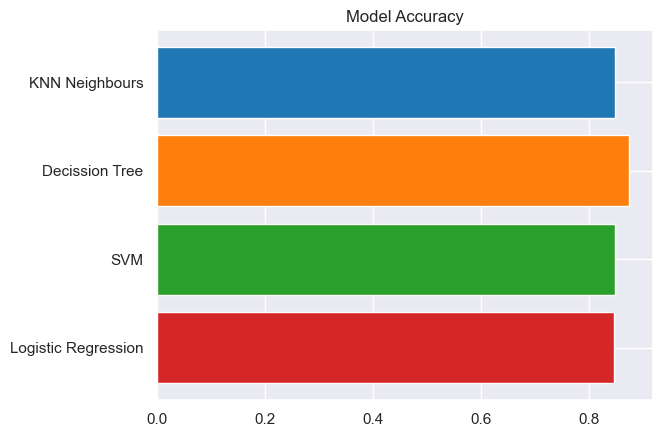

In [56]:
### PLOT THE MODEL ACCURACY
color = ['tab:red', 'tab:green', 'tab:orange', 'tab:blue', ]
plt.barh(df['Model'], df['Model Accuracy'], color =color)
plt.title('Model Accuracy')

Text(0.5, 1.0, 'Test Accuracy')

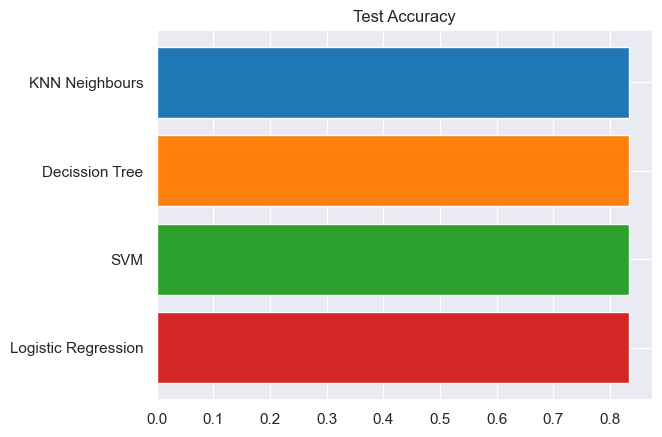

In [57]:
### PLOT THE TEST ACCURACY
color = ['tab:red', 'tab:green', 'tab:orange', 'tab:blue', ]
plt.barh(df['Model'], df['Test Accuracy'], color =color)
plt.title('Test Accuracy')

<BarContainer object of 4 artists>

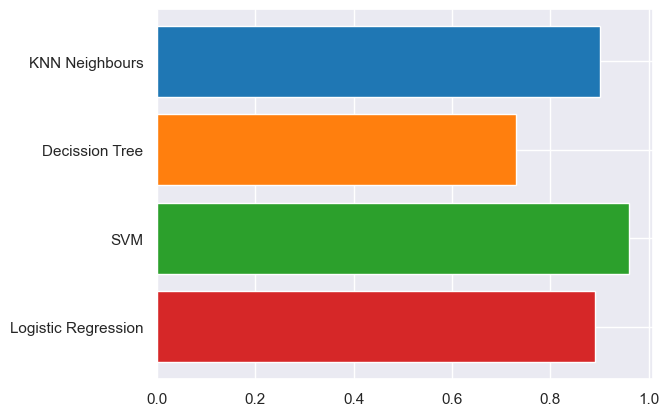

In [58]:
### PLOT THE ROC
color = ['tab:red', 'tab:green', 'tab:orange', 'tab:blue', ]
plt.barh(df['Model'], df['AUROC'], color =color)


<BarContainer object of 4 artists>

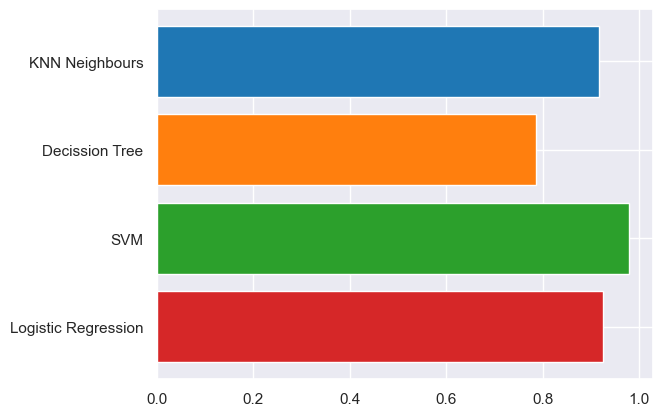

In [59]:
### PLOT THE AUPRC
color = ['tab:red', 'tab:green', 'tab:orange', 'tab:blue', ]
plt.barh(df['Model'], df['AUPRC'], color =color)

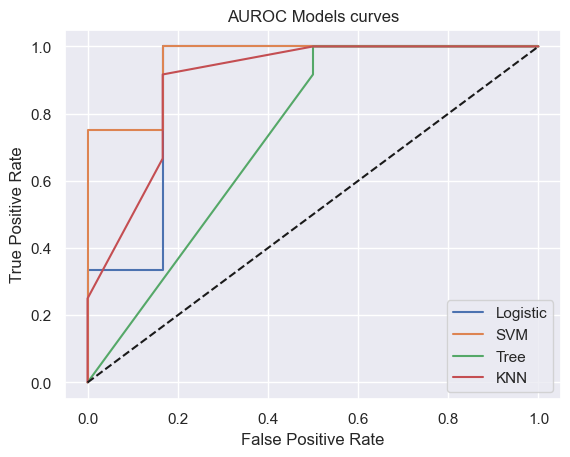

In [60]:
### PLOT THE ROC CURVES

sns.set()

plt.plot(fpr_log, tpr_log, label='Logistic')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_tree, tpr_tree, label='Tree')
plt.plot(fpr_knn, tpr_knn, label='KNN')

plt.plot(fpr_log, fpr_log, linestyle = '--', color = 'k')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.title('AUROC Models curves');

plt.show()

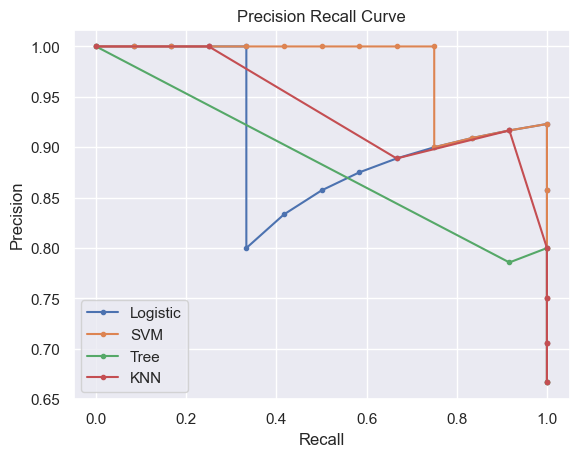

In [61]:
### PLOT THE AUPRC CURVES

plt.plot(recall_log, precision_log, marker='.', label='Logistic')
plt.plot(recall_svm, precision_svm, marker='.', label='SVM')
plt.plot(recall_tree, precision_tree, marker='.', label='Tree')
plt.plot(recall_knn, precision_knn, marker='.', label='KNN')

#plt.plot(precision_log, precision_log, linestyle = '--', color = 'k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision Recall Curve')

plt.show()

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
